In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Facebook_Marketplace_data.csv')

In [3]:
print(df.columns)

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')


In [4]:
for i in df.columns:
  print(f"{i} has {df[i].isnull().sum()} null values")

status_id has 0 null values
status_type has 0 null values
status_published has 0 null values
num_reactions has 0 null values
num_comments has 0 null values
num_shares has 0 null values
num_likes has 0 null values
num_loves has 0 null values
num_wows has 0 null values
num_hahas has 0 null values
num_sads has 0 null values
num_angrys has 0 null values
Column1 has 7050 null values
Column2 has 7050 null values
Column3 has 7050 null values
Column4 has 7050 null values


In [37]:
print(df.head())

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

In [6]:
X = df.iloc[:,:-4]
#print(X.head())
Y = df.iloc[:,range(3,6)]
print(Y.head())

   num_reactions  num_comments  num_shares
0            529           512         262
1            150             0           0
2            227           236          57
3            111             0           0
4            213             0           0


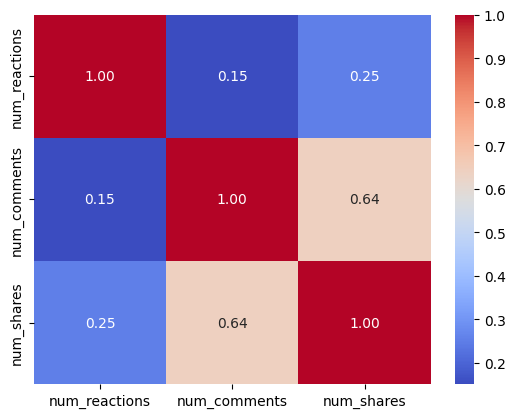

In [7]:
correlation_matrix = Y.corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [8]:
#print(X.head())
Z = df.iloc[:,[1,3,4,5,6,7,8,9,10,11]]
print(Z)

     status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1            

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
le = LabelEncoder()
Z['status_type'] = le.fit_transform(Z['status_type'])
print(Z)
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)
print(Z_scaled)


      status_type  num_reactions  num_comments  num_shares  num_likes  \
0               3            529           512         262        432   
1               1            150             0           0        150   
2               3            227           236          57        204   
3               1            111             0           0        111   
4               1            213             0           0        204   
...           ...            ...           ...         ...        ...   
7045            1             89             0           0         89   
7046            1             16             0           0         14   
7047            1              2             0           0          1   
7048            1            351            12          22        349   
7049            1             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1

<ipython-input-9-9a890451b9be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['status_type'] = le.fit_transform(Z['status_type'])


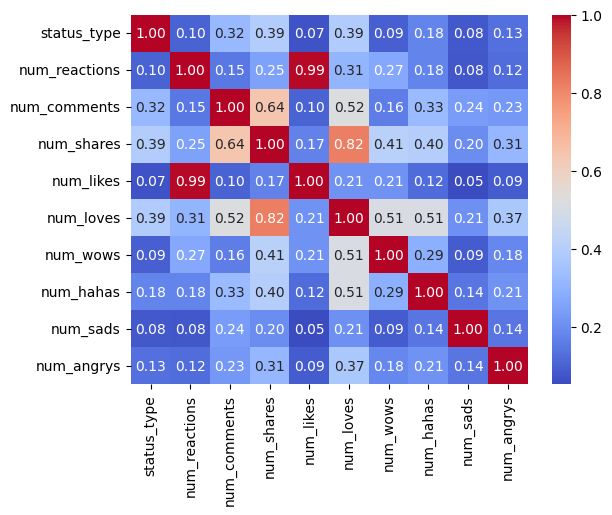

In [10]:
correlation = Z.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

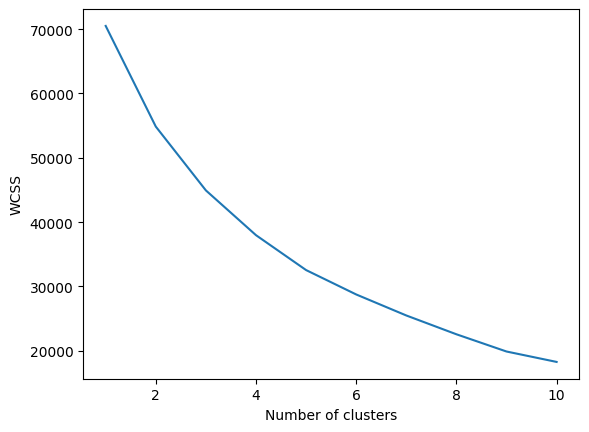

In [40]:
from sklearn.cluster import KMeans
wmeans = []
for i in range(1,11):
  kmean = KMeans(n_clusters = i , init = "k-means++",random_state = 42)
  kmean.fit(Z_scaled)
  wmeans.append(kmean.inertia_)

plt.plot(range(1,11),wmeans)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


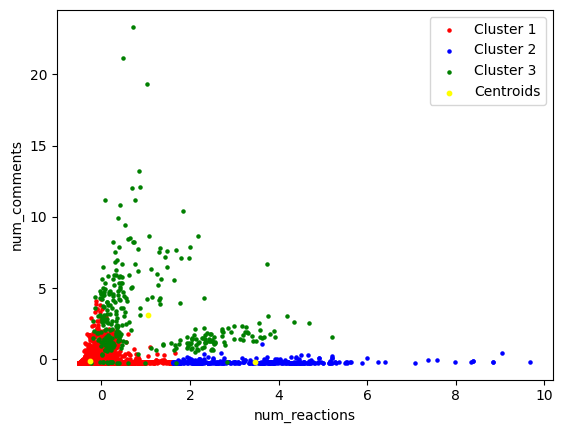

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmean = KMeans(n_clusters = 3 , init = "k-means++",random_state = 42)
y_kmeans = kmean.fit_predict(Z_scaled)

# Choose two columns from Z for plotting
plt.scatter(Z_scaled[y_kmeans == 0][:, 1], Z_scaled[y_kmeans == 0][:, 2], s = 5, c = 'red', label = 'Cluster 1') # Changed X to Z and using column indices 1 and 3 for plotting. Adjust as needed.
plt.scatter(Z_scaled[y_kmeans == 1][:, 1], Z_scaled[y_kmeans == 1][:, 2], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(Z_scaled[y_kmeans == 2][:, 1], Z_scaled[y_kmeans == 2][:, 2], s = 5, c = 'green', label = 'Cluster 3')
#plt.scatter(Z_scaled[y_kmeans == 3][:, 1], Z_scaled[y_kmeans == 3][:, 2], s = 5, c = 'orange', label = 'Cluster 4')
#plt.scatter(Z_scaled[y_kmeans == 4][:, 1], Z_scaled[y_kmeans == 4][:, 2], s = 5, c = 'pink', label = 'Cluster 5')
plt.scatter(kmean.cluster_centers_[:, 1], kmean.cluster_centers_[:, 2], s = 10, c = 'yellow', label = 'Centroids')
plt.ylabel("num_comments")
plt.xlabel("num_reactions")
plt.legend()
plt.show()

In [25]:
print(len(Z_scaled[y_kmeans == 0]))
print(len(Z_scaled[y_kmeans == 1]))
print(len(Z_scaled[y_kmeans == 2]))

6362
368
320


In [41]:
print(scaler.inverse_transform(Z_scaled[y_kmeans == 0]).mean(axis=0)[range(1,4)])
print(scaler.inverse_transform(Z_scaled[y_kmeans == 1]).mean(axis=0)[range(1,4)])
print(scaler.inverse_transform(Z_scaled[y_kmeans == 2]).mean(axis=0)[range(1,4)])

[112.96463376  93.42046526  19.74693493]
[1832.58152174   61.78532609   11.75271739]
[ 716.421875 3014.475     475.6375  ]
